In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install spacy


In [3]:
import spacy

def generate_summary(text):
    # Load spaCy language model
    nlp = spacy.load("en_core_web_sm")

    # Process the text
    doc = nlp(text)

    # Extract sentences and rank them based on importance (e.g., using sentence length)
    sentences = [sent.text for sent in doc.sents]
    ranked_sentences = sorted(sentences, key=len, reverse=True)

    # Choose the top N sentences for the summary
    summary_length = min(5, len(ranked_sentences))  # You can adjust the summary length
    summary = ranked_sentences[:summary_length]

    return " ".join(summary)



In [4]:
#/content/drive/MyDrive/nlp/clean_data.csv

import pandas as pd

file_path = '/content/drive/MyDrive/nlp/clean_data.csv'
df = pd.read_csv(file_path)
df = df.dropna()


In [5]:
random_sample = df.sample(n=500, random_state=30)

In [6]:
df = random_sample

In [7]:
import pandas as pd

# Assuming your dataframe is named df
df['Text'] = df['Text'].str.replace(r"[\"']", "")
df['Summary'] = df['Summary'].str.replace(r"[\"']", "")


<ipython-input-7-6673106bc568>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Text'] = df['Text'].str.replace(r"[\"']", "")
<ipython-input-7-6673106bc568>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Summary'] = df['Summary'].str.replace(r"[\"']", "")


In [8]:
df

,Unnamed: 0,Text,Summary
58637,58637,the us state of new jersey on monday passed a ...,flying a drone while drunk made illegal in us ...
25892,25892,the eight-year-old daughter of an auto driver ...,eight-year-old girl crushed under school gate ...
60009,60009,the secretary of iran supreme national securi...,iran calls for muslim unity to counter us divi...
9384,9384,iran would not comply with the fully illegal u...,iran says it will not comply with illegal us s...
30610,30610,"photographs of a police officer, pravin singh,...","police officer kneels down before cm yogi, pho..."
...,...,...,...
13513,13513,"while addressing an event on monday, congress ...",all institutions including media under attack:...
91134,91134,a belgian court has ruled that advertising cla...,nutella maker wins case against rival false h...
66549,66549,the relationship between the us and turkey are...,us likens its relationship with turkey to marr...
28520,28520,the amarnath yatra from jammu has been suspend...,amarnath yatra from jammu suspended ahead of i...


In [10]:
from tqdm import tqdm
summarys = []

for index, row in tqdm(df.iterrows()):
    text_data = row['Text']
    input_text = text_data
    summary = generate_summary(input_text)
    summarys.append(summary)



500it [07:31,  1.11it/s]


In [11]:
summarys[0]

'the us state of new jersey on monday passed a law making it illegal to fly an unmanned drone aircraft while being drunk. the law prohibits flying a drone with a blood alcohol content of 0.08% or higher, the same as for driving a vehicle. meanwhile, violators will face up to six months in jail, a $1,000 fine or both.'

In [12]:
!pip install rouge_score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24933 sha256=a73e8648aaa36f1200498561ccf73a9dc1440ccd9530ba017821d463f9a2db9b
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge_score


In [13]:
i = 0

precision_rouge1 =[]
precision_rouge2 =[]
recal_rouge1 =[]
recal_rouge2 =[]
fvalue_rouge1 =[]
fvalue_rouge2 =[]


from rouge_score import rouge_scorer
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2'])

for index, row in tqdm(df.iterrows()):
    text_data = row['Summary']
    reference_summary = text_data
    model_summary = summarys[i]

    scores = scorer.score(model_summary, reference_summary)

    precision_rouge1.append(scores['rouge1'].precision)
    precision_rouge2.append(scores['rouge2'].precision)
    recal_rouge1.append(scores['rouge1'].recall)
    recal_rouge2.append(scores['rouge2'].recall)
    fvalue_rouge1.append(scores['rouge1'].fmeasure)
    fvalue_rouge2.append(scores['rouge2'].fmeasure)
    i = i +1



500it [00:00, 1228.59it/s]


In [14]:
len(precision_rouge1)

500

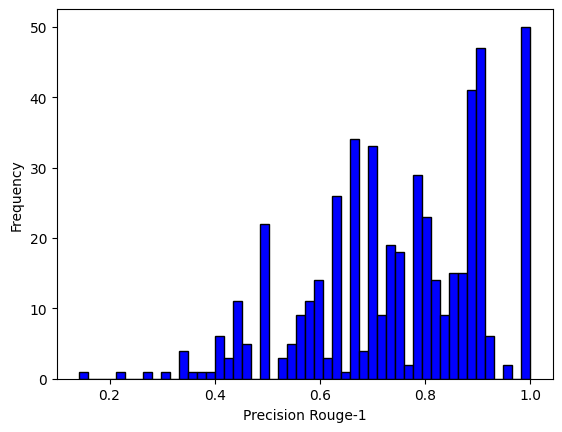

In [15]:
import matplotlib.pyplot as plt
# Sample data
precision_rouge1 # You need to define your data here
# Creating a histogram
plt.hist(precision_rouge1, bins=50, color='blue', edgecolor='black')
# Adding labels and title
plt.xlabel('Precision Rouge-1')
plt.ylabel('Frequency')
# Display the plot
plt.show()


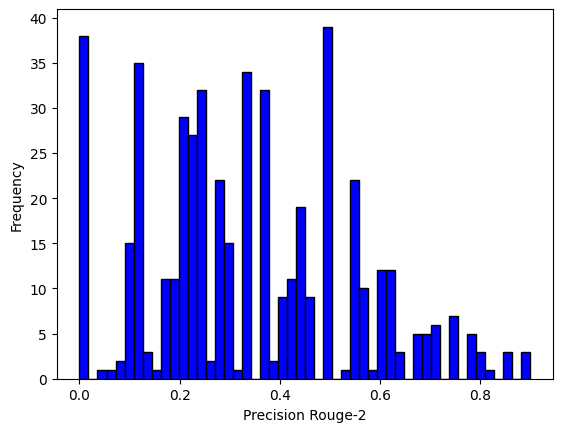

In [16]:
import matplotlib.pyplot as plt
# Sample data
precision_rouge2 # You need to define your data here
# Creating a histogram
plt.hist(precision_rouge2, bins=50, color='blue', edgecolor='black')
# Adding labels and title
plt.xlabel('Precision Rouge-2')
plt.ylabel('Frequency')
# Display the plot
plt.show()


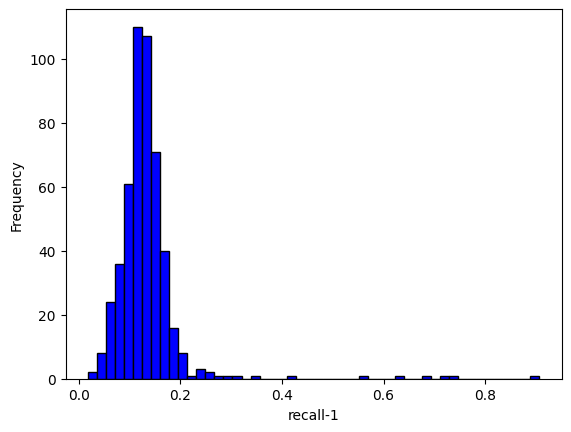

In [17]:
import matplotlib.pyplot as plt
# Sample data
recal_rouge1# You need to define your data here
# Creating a histogram
plt.hist(recal_rouge1, bins=50, color='blue', edgecolor='black')
# Adding labels and title
plt.xlabel('recall-1')
plt.ylabel('Frequency')
# Display the plot
plt.show()


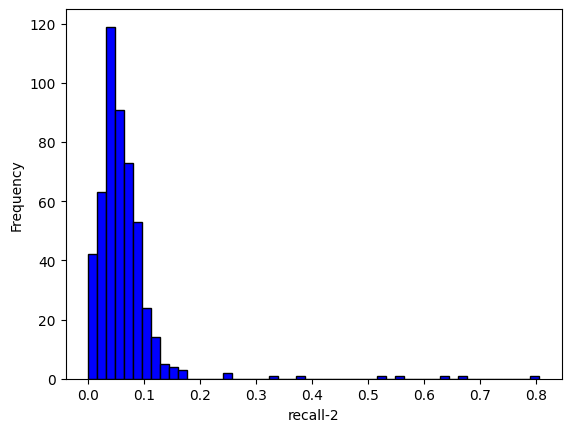

In [18]:
import matplotlib.pyplot as plt
# Sample data
recal_rouge2# You need to define your data here
# Creating a histogram
plt.hist(recal_rouge2, bins=50, color='blue', edgecolor='black')
# Adding labels and title
plt.xlabel('recall-2')
plt.ylabel('Frequency')
# Display the plot
plt.show()

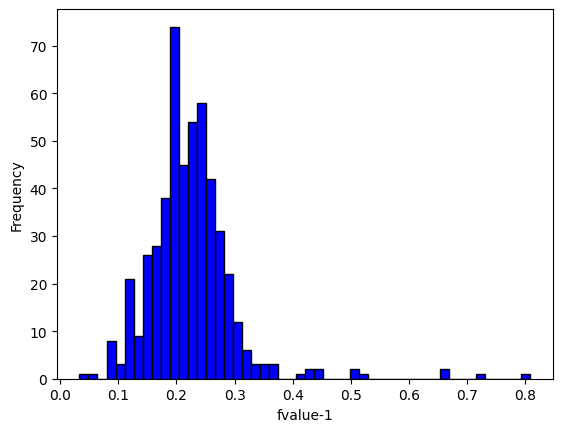

In [19]:
import matplotlib.pyplot as plt
# Sample data
fvalue_rouge1# You need to define your data here
# Creating a histogram
plt.hist(fvalue_rouge1, bins=50, color='blue', edgecolor='black')
# Adding labels and title
plt.xlabel('fvalue-1')
plt.ylabel('Frequency')
# Display the plot
plt.show()

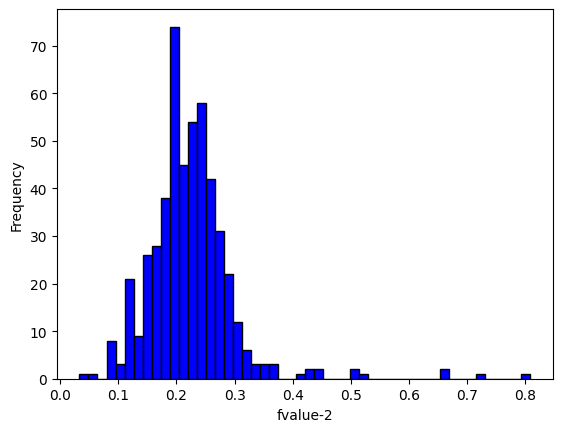

In [20]:
import matplotlib.pyplot as plt
# Sample data
fvalue_rouge2# You need to define your data here
# Creating a histogram
plt.hist(fvalue_rouge1, bins=50, color='blue', edgecolor='black')
# Adding labels and title
plt.xlabel('fvalue-2')
plt.ylabel('Frequency')
# Display the plot
plt.show()